In [1]:
!nvidia-smi

Sat Feb 26 17:22:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip

--2022-02-26 17:22:56--  https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fxn3ldztzwxm0rw/FruitsData.zip [following]
--2022-02-26 17:22:56--  https://www.dropbox.com/s/raw/fxn3ldztzwxm0rw/FruitsData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc213d2e0cf50a8c0000b8dc778c.dl.dropboxusercontent.com/cd/0/inline/Bgd17lNp-ff7a-TgMLCsj2h9NDugZHBNNs9lefKkYsEexLI6AgijtKTXwvylJaKTTQV3qUFHeHofwkBeabYct6YEsy5sDp8ryd-x9HCUBukugDCAmJ-g5gJGZEK_5PgIiLxzvEfF5wLiFh4atwREpJlT/file# [following]
--2022-02-26 17:22:57--  https://uc213d2e0cf50a8c0000b8dc778c.dl.dropboxusercontent.com/cd/0/inline/Bgd17lNp-ff7a-TgMLCsj2h9NDugZHBNNs9lefKkYsEexLI6AgijtKTXwvylJaKTTQV3qUFHeHofwkBeabYc

In [3]:
!unzip -q "/content/FruitsData.zip"

In [4]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [5]:
# Creating the Pathlib PATH objects
train_path = Path("fruits-360/Training")
test_path = Path("fruits-360/Test")

In [6]:
# Getting Image paths 
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x) , train_image_paths))

train_image_paths[:10]

['fruits-360/Training/Pear Monster/298_100.jpg',
 'fruits-360/Training/Pear Monster/r_319_100.jpg',
 'fruits-360/Training/Pear Monster/r_123_100.jpg',
 'fruits-360/Training/Pear Monster/r_127_100.jpg',
 'fruits-360/Training/Pear Monster/r_104_100.jpg',
 'fruits-360/Training/Pear Monster/183_100.jpg',
 'fruits-360/Training/Pear Monster/r_266_100.jpg',
 'fruits-360/Training/Pear Monster/r_318_100.jpg',
 'fruits-360/Training/Pear Monster/r_154_100.jpg',
 'fruits-360/Training/Pear Monster/r_311_100.jpg']

In [7]:
# Getting their respective labels 

def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
train_image_labels[:10]

['Pear Monster',
 'Pear Monster',
 'Pear Monster',
 'Pear Monster',
 'Pear Monster',
 'Pear Monster',
 'Pear Monster',
 'Pear Monster',
 'Pear Monster',
 'Pear Monster']

In [8]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([88, 88, 88, 88, 88, 88, 88, 88, 88, 88])

In [9]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels)

In [11]:
Train_paths[:10] , Train_labels[:10]

(['fruits-360/Training/Cocos/149_100.jpg',
  'fruits-360/Training/Blueberry/r_50_100.jpg',
  'fruits-360/Training/Apple Golden 1/r_302_100.jpg',
  'fruits-360/Training/Grape Blue/545_100.jpg',
  'fruits-360/Training/Cocos/r_224_100.jpg',
  'fruits-360/Training/Huckleberry/274_100.jpg',
  'fruits-360/Training/Pepino/r_126_100.jpg',
  'fruits-360/Training/Mulberry/51_100.jpg',
  'fruits-360/Training/Limes/r_319_100.jpg',
  'fruits-360/Training/Physalis/267_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [12]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [13]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 224 
BATCH_SIZE = 32

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [14]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
    
    dataset = dataset.repeat()
    return dataset

In [15]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 699 ms, sys: 30.6 ms, total: 730 ms
Wall time: 850 ms
(32, 224, 224, 3)
(32, 131)


Walnut


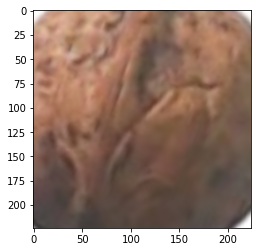

In [16]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [17]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 175 ms, sys: 11.8 ms, total: 187 ms
Wall time: 179 ms
(32, 224, 224, 3)
(32, 131)


Strawberry Wedge


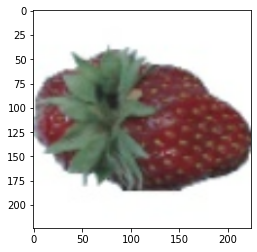

In [18]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [19]:
#Model InceptionV3
from tensorflow.keras.applications import InceptionV3

backbone = InceptionV3(
    input_shape=(224,224,3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 131)               16899     
                                                                 
Total params: 22,081,955
Trainable params: 22,047,523
N

In [20]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [21]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=1,
    #callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

1586/1586 [==============================] - 542s 329ms/step - loss: 1.0865 - accuracy: 0.6999 - precision: 0.8642 - recall: 0.6200 - val_loss: 2.1634 - val_accuracy: 0.5967 - val_precision: 0.6310 - val_recall: 0.5769


In [22]:
model.layers[0].trainable = False

In [23]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 131)               16899     
                                                                 
Total params: 22,081,955
Trainable params: 279,171
Non-trainable params: 21,802,784
____________________________________

In [25]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/8
1586/1586 [==============================] - ETA: 0s - loss: 0.2046 - accuracy: 0.9345 - precision: 0.9449 - recall: 0.9245
Epoch 1: val_loss improved from inf to 0.95267, saving model to best_weights.h5
1586/1586 [==============================] - 527s 331ms/step - loss: 0.2046 - accuracy: 0.9345 - precision: 0.9449 - recall: 0.9245 - val_loss: 0.9527 - val_accuracy: 0.7981 - val_precision: 0.8222 - val_recall: 0.7830
Epoch 2/8
1586/1586 [==============================] - ETA: 0s - loss: 0.1318 - accuracy: 0.9579 - precision: 0.9635 - recall: 0.9531
Epoch 2: val_loss did not improve from 0.95267
1586/1586 [==============================] - 522s 329ms/step - loss: 0.1318 - accuracy: 0.9579 - precision: 0.9635 - recall: 0.9531 - val_loss: 2.6694 - val_accuracy: 0.6046 - val_precision: 0.6164 - val_recall: 0.5917
Epoch 3/8
1586/1586 [==============================] - ETA: 0s - loss: 0.1127 - accuracy: 0.9654 - precision: 0.9691 - recall: 0.9622
Epoch 3: val_loss did not improve

Testing Phase

In [26]:
from tensorflow.keras.applications import InceptionV3

backbone = InceptionV3(
    input_shape=(224,224,3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [27]:
model.load_weights("best_weights.h5")

In [28]:
# Create a Dataset Object for 'Testing' Set just the way we did for Training and Validation
test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x) , test_image_paths))
test_labels = list(map(lambda x : get_label(x) , test_image_paths))

test_labels = Le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

def decode_image(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    return image , label

test_dataset = (
     tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

In [29]:
# Verify Test Dataset Object
image , label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Pear Monster


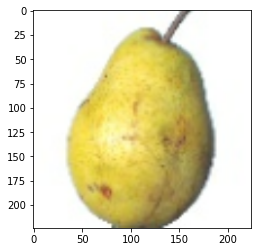

In [30]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [31]:
# Evaluating the loaded model
loss, acc, prec, rec = model.evaluate(test_dataset)

print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

709/709 [==============================] - 39s 51ms/step - loss: 1.2323 - accuracy: 0.7408 - precision: 0.7690 - recall: 0.7243
 Testing Acc :  0.7408321499824524
 Testing Precision  0.7690111994743347
 Testing Recall  0.7243036031723022


Real time case

In [32]:
def LoadImage(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image , 0)
    return image

def RealtimePrediction(image_path , model, encoder_):
    image = LoadImage(image_path)
    prediction = model.predict(image)
    prediction = np.argmax(prediction , axis = 1)
    return encoder_.inverse_transform(prediction)[0]

'Apple Braeburn'

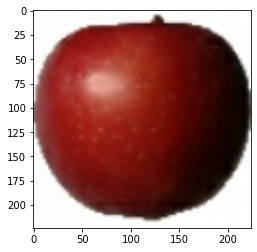

In [33]:
RealtimePrediction("/content/fruits-360/Training/Apple Braeburn/100_100.jpg" , model , Le)